## Phase 2 Project Submission: Group 12

**Student names:**

1. George Tido
2. Caroline Kisaulu 
3. Caroline Ngabu 
4. Vivian Maiyo 
5. Faith Gitau 
6. Lewis Gitari


## House Price Prediction in King County

### Introduction
The real estate industry is intricate, with numerous factors influencing property prices. Accurate house price predictions benefit both sellers and buyers. In this project, we will utilize the King County House data, which provides information on real estate prices in King County, Washington. The goal is to construct a regression model that predicts house selling prices based on various features. Regression analysis techniques will be employed to analyze the data and develop a model capable of estimating house prices. This project aims to offer insights into the factors influencing house prices, aiding informed decision-making for both buyers and sellers.


## Business Problem

The surge in population has led to a lack of affordable housing, intensifying demand.
Misrepresentation of house grade by property owners or developers, potentially driving prices up.
Limited availability of residential units in King County, causing increased costs across different grades.
Disparities in the housing market, especially in desirable areas, leading to high property values.
Limited land supply, particularly in sought-after locations close to job centers and transportation.

**Proposed Solutions:**

Increase affordable housing by identifying essential house features that don't inflate prices.
Implement stringent, independent standards for house grading, detaching from developers' influence.
Construct high-rise buildings to counteract land scarcity in desirable areas.


### Objectives

To develop a linear regression model capable of accurately predicting house prices in King County.

To analyze the relationship between home features and house sale prices in King County. 

To provide data driven insights to real estate stakeholders on maximizing returns by focusing on features with the most significant impact on house sale prices.


### Analysis Questions

1. Which predictor variables are correlated with the dependent variable (house sale price)?
2. Which variables best predict the house sale price in a multiple linear regression model?
3. Which house features can developers focus on to enhance affordable housing?

## Data Understanding

### King County Dataset Column Names and Descriptions

- **id** - Unique identifier for a house
- **date** - Date house was sold
- **price** - Sale price (prediction target)
- **bedrooms** - Number of bedrooms
- **bathrooms** - Number of bathrooms
- **sqft_living** - Square footage of living space in the home
- **sqft_lot** - Square footage of the lot
- **floors** - Number of floors (levels) in house
- **waterfront** - Whether the house is on a waterfront
- **view** - Quality of view from house
- **condition** - How good the overall condition of the house is. Related to maintenance of house.
- **grade** - Overall grade of the house. Related to the construction and design of the house.
- **sqft_above** - Square footage of house apart from basement
- **sqft_basement** - Square footage of the basement
- **yr_built** - Year when house was built
- **yr_renovated** - Year when house was renovated
- **zipcode** - ZIP Code used by the United States Postal Service
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Data Preparation

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfm
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

plt.style.use('seaborn')
import warnings
warnings.filterwarnings('ignore')


In [2]:
#reading the data

df = pd.read_csv('data/kc_house_data.csv')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Data Preparation
#Summary of the Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#checking number of unique values

df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [5]:
#Check the total number of null values

df.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
#Checking the percentage of Missing values

def miss_percent(df, col):
    miss = ((df[col].sum()) / len(df[col])) * 100
    return print(f'There is {miss} percent of values missing in {col}.')

In [7]:
#checking percentage of missing values in waterfront

dfmiss = (df.isna().sum()/len(df))*100
dfmiss

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [8]:
#dealing with yr_renovated

df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [9]:
#Replacing the null with a specified value

def replace_nan(df,col, replace_value):
    return df[col].fillna(replace_value, inplace=True)

In [10]:
# replacing the null values
df['yr_renovated'].replace(0.0, np.nan, inplace=True)
df['yr_renovated'].fillna(df['yr_built'], inplace=True)

In [11]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,2009.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,2014.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,2009.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,2004.0,98027,47.5345,-122.069,1410,1287


In [12]:
# confirming the null values have been removed
miss_percent(df, 'yr_renovated')

There is 197294.51312682318 percent of values missing in yr_renovated.


In [13]:
#Dealing with Waterfront missing values
#Investigating the columns

print(f'Unique values: {df.waterfront.unique()}')
print(f'Count: {df.waterfront.value_counts()}')

Unique values: [nan 'NO' 'YES']
Count: NO     19075
YES      146
Name: waterfront, dtype: int64


In [14]:
# replacing the null values with zero

replace_nan(df, 'waterfront', 'NO')

In [15]:
# replacing a value with another
def substitute(df,col,original_value, sub_value):
    return df[col].replace(original_value, sub_value, inplace=True)

In [16]:
# changing YES to 1

substitute(df, 'waterfront', 'YES',1)

# changing NO to 0
substitute(df, 'waterfront', 'NO', 0)

In [17]:
#  confirming null values are out

miss_percent(df, 'waterfront')

There is 0.6760198175672547 percent of values missing in waterfront.


In [18]:
#Dealing with VIEW
#Investigating the Colum

print(f'Unique values:{df.view.unique()}')
print(f'Count:{df.view.value_counts()}')

Unique values:['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
Count:NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [19]:
#Replacing Null values with Nun

replace_nan(df,'view', 'NONE')

In [20]:
# changing the rating to numbers

substitute(df, 'view', ['NONE', 'FAIR', 'AVERAGE', 'GOOD','EXCELLENT'],[0,1 ,2,3,4])

In [21]:
# checking count

df['view'].value_counts()

0    19485
2      957
3      508
1      330
4      317
Name: view, dtype: int64

In [22]:
#Dealing with sqft_basement
# investigating the column

print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
862.0         1
1135.0        1
3000.0        1
768.0         1
1960.0        1
Name: sqft_basement, Length: 304, dtype: int64


The column has ? as an entry. 0.0 is the most occuring and we change ? to it.

In [23]:
# change ? to 0.0

substitute(df, 'sqft_basement', '?', 0.0)
df.sqft_basement = df.sqft_basement.astype(float)
print(f'Count:{df.sqft_basement.value_counts()}')

Count:0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64


In [24]:
#Dealing with condition
#investigating the column

print(f'Unique value:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}')

Unique value:['Average' 'Very Good' 'Good' 'Poor' 'Fair']
Count:Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64


There are 5 ratings and we decide to assign them numbers on a scale of 1 to 5 with 5 being very good

In [25]:
# assigning the ratings numbers

substitute(df, 'condition', ['Poor', 'Fair', 'Average', 'Good', 'Very Good'],[1,2,3,4,5])
print(f'Unique values:{df.condition.unique()}')
print(f'Count:{df.condition.value_counts()}') 

Unique values:[3 5 4 1 2]
Count:3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


In [26]:
#Dealing with Grade
#Investigating the colum

print(f'Unique values:{df.grade.unique()}')
print(f'Count:{df.grade.value_counts()}')

Unique values:['7 Average' '6 Low Average' '8 Good' '11 Excellent' '9 Better' '5 Fair'
 '10 Very Good' '12 Luxury' '4 Low' '3 Poor' '13 Mansion']
Count:7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64


Assign the ratings as numbers with the numbers they have beside them

In [27]:
substitute(df, 'grade', ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'],[3,4,5,6,7,8,9,10,11,12,13])
print(f'Unique values:{df.grade.unique()}')
print(f'Count:{df.grade.value_counts()}') 

Unique values:[ 7  6  8 11  9  5 10 12  4  3 13]
Count:7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


In [28]:
#Dealing with Bathrooms
#Investigating the colum

print(f'Count:{df.bathrooms.value_counts()}')

Count:2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


bathrooms have float values. We decided to round up to the next integer so as to have whole numbers. In this case, rounding off might make the 0.5 to be 0 which we don't want.

In [29]:
# rounding up the decimals
df['bathrooms'] = df['bathrooms'].apply(np.ceil).astype(int)
df.bathrooms.value_counts()

3    9362
2    6432
1    3926
4    1611
5     223
6      33
7       6
8       4
Name: bathrooms, dtype: int64

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1,1180,5650,1.0,0,0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,3,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1,770,10000,1.0,0,0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3,1960,5000,1.0,0,0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2,1680,8080,1.0,0,0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [31]:
#Checking if we have duplicates on our dataset

duplicates = []
def identify_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('The data has no duplicates')
    else:
        duplicates_rows = 0
        for j in duplicates:
            if (j == True):
                duplicates_rows += 1
                # percentage of data represented by duplicates
                duplicates_percentage = np.round(((duplicates_rows/len(data)) * 100), 2)
                print(f'The data has {duplicates_rows} duplicated rows')
                print(f'Duplicated rows contitute of {duplicates_percentage}% of the dataframe')

In [32]:
identify_duplicates(df)

The data has no duplicates


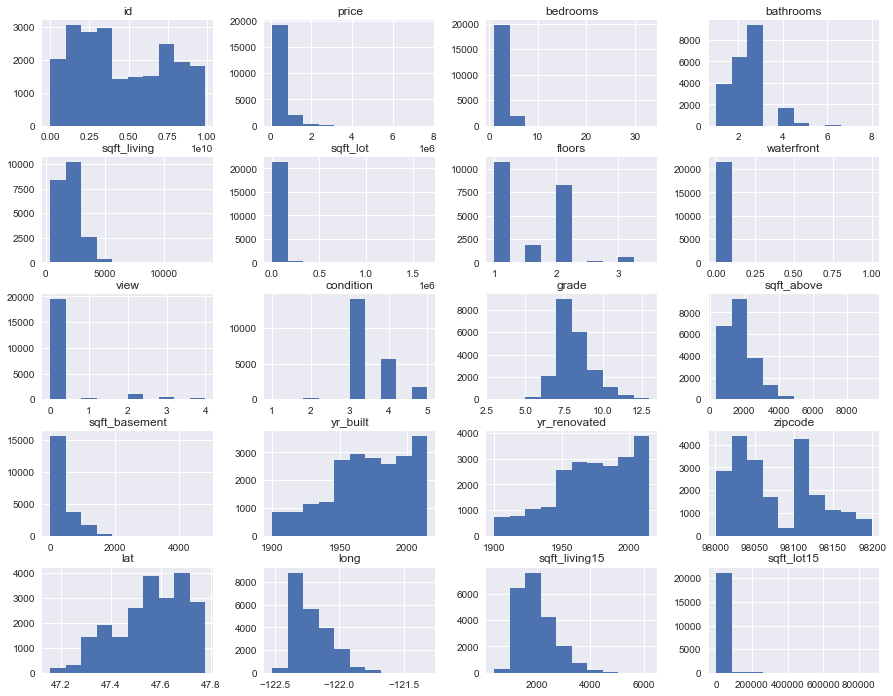

In [33]:
#Checking for outliers using histograms to help us get insights of the spread of various features

df.hist(figsize = (15,12))
plt.show()

* grade, condition and floors appear to be on a reasonable scale with no apparent outliers.

* Waterfront is a binary 1/10 features.

* I need to consider potential outliers in bedrooms, bathrooms and the sqft-type features.

In [34]:
# Investigating  bedrooms

df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [35]:
# check on bedrooms with 33

df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,2,1620,6000,1.0,0,0,...,7,1040,580.0,1947,1947.0,98103,47.6878,-122.331,1330,4700


The house has 2 bathrooms and a price of 640,000. This seem to indicate 33 might have been an error. Replace it with 3.

In [36]:
# Fixing error for bedrooms

def remove_outliers(df):
    # define the columns to remove outliers from
    cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15']

    # remove outliers from the specified columns
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df = df[(df[col] >= q1 - (2.5 * iqr * (len(df[col]) / (len(df[col]) + 1)))) & (df[col] <= q3 + (2.5 * iqr * (len(df[col]) / (len(df[col]) + + 1))))]
    
    # return the modified DataFrame
    return df

In [37]:
df = remove_outliers(df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18977 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18977 non-null  int64  
 1   date           18977 non-null  object 
 2   price          18977 non-null  float64
 3   bedrooms       18977 non-null  int64  
 4   bathrooms      18977 non-null  int32  
 5   sqft_living    18977 non-null  int64  
 6   sqft_lot       18977 non-null  int64  
 7   floors         18977 non-null  float64
 8   waterfront     18977 non-null  int64  
 9   view           18977 non-null  int64  
 10  condition      18977 non-null  int64  
 11  grade          18977 non-null  int64  
 12  sqft_above     18977 non-null  int64  
 13  sqft_basement  18977 non-null  float64
 14  yr_built       18977 non-null  int64  
 15  yr_renovated   18977 non-null  float64
 16  zipcode        18977 non-null  int64  
 17  lat            18977 non-null  float64
 18  long  

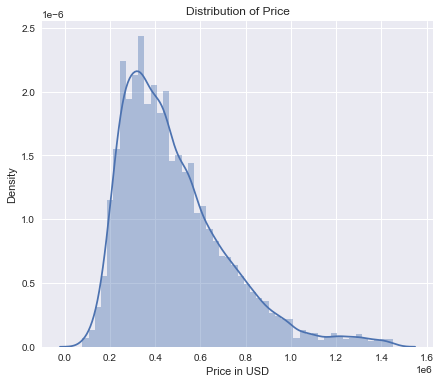

In [39]:
# Viewing price distribution

plt.figure(figsize=(7,6))
dist=sns.distplot(df["price"])
dist.set_title("Price distribution")
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

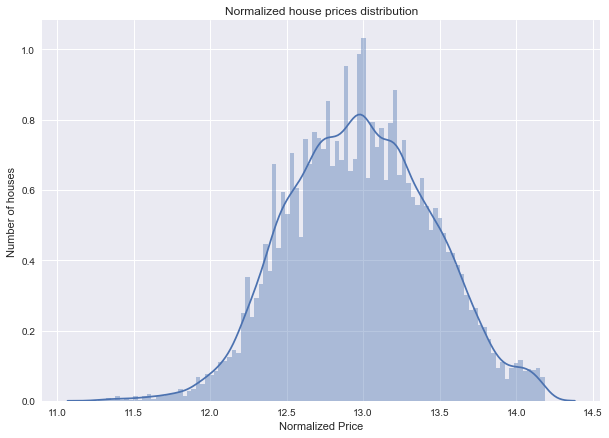

In [40]:
#Normalizing Price Distribution

fig, ax = plt.subplots(figsize=(10, 7))

sns.distplot(np.log(df['price']), bins = 100) 

ax.set_xlabel("Normalized Price")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")
plt.show()

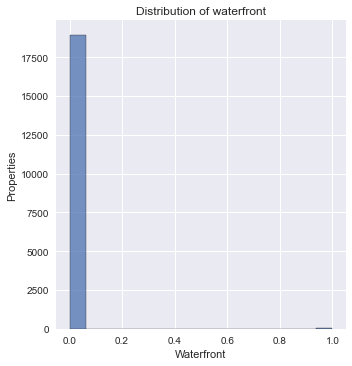

In [41]:
#Exploring how waterfront features influences the prices of a house
#Distribution of a Water front feture

sns.displot(data=df, x='waterfront')
plt.title('Distribution of waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Properties')
plt.show()

Majority of the properties do not have a waterfront

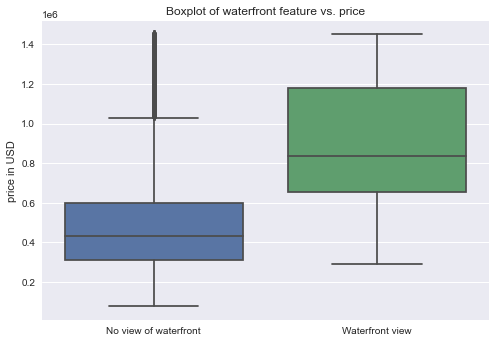

In [42]:
# Plot boxplot of waterfront feature

sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('No view of waterfront', 'Waterfront view'))
plt.show()

In [43]:
waterfrontmean = df[df['waterfront'] == 1]['price'].mean()
nowaterfrontmean = df[df['waterfront'] == 0]['price'].mean()
print(f"The mean  price for a house with waterfront  is  {round(waterfrontmean,2)} USD")
print(f"The mean  price for a house without waterfront is  {round(nowaterfrontmean,2)} USD")
print(f"Percentage of houses with waterfront is: {len(df[df['waterfront'] == 1])/len(df)*100}")

The mean  price for a house with waterfront  is  890690.82 USD
The mean  price for a house without waterfront is  483804.79 USD
Percentage of houses with waterfront is: 0.25820730357801547


From the above findings we can conclude;

Waterfront has a significant effect on the price with the mean price of houses with waterfront being almost double of those without. However only about 0.20% of houses have a waterfront.

In [44]:
#features that can be considered to be 'attached' to the house.

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

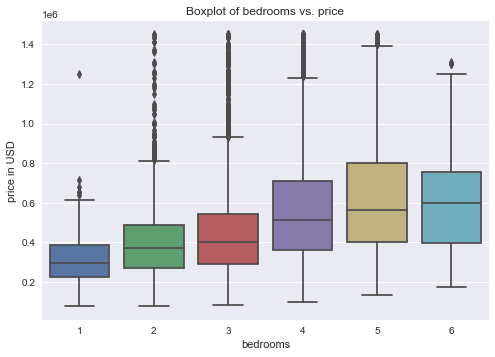

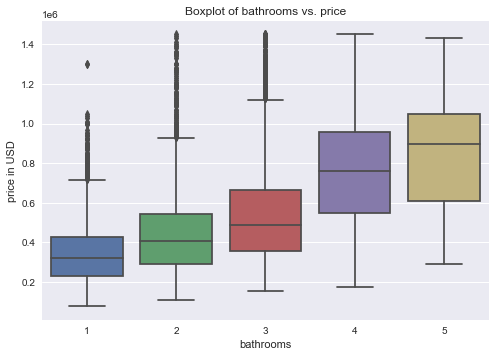

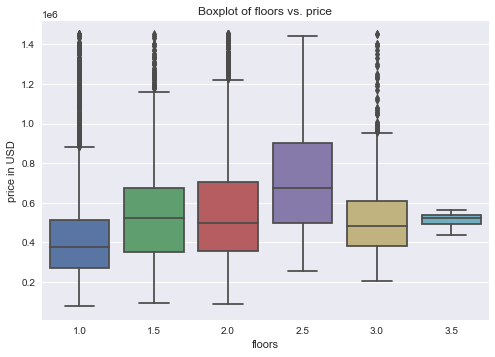

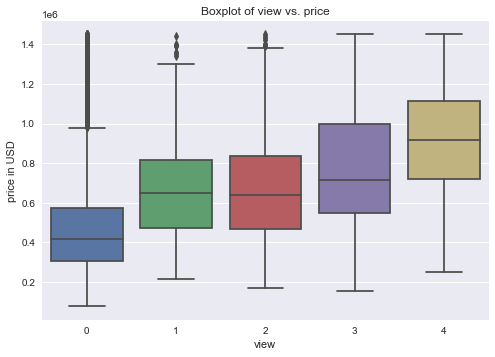

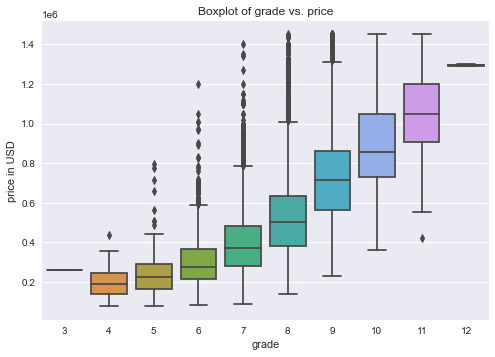

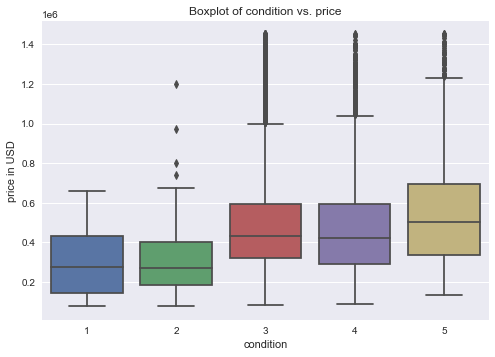

In [45]:
# categorical variables
features = ['bedrooms', 'bathrooms', 'floors', 'view', 'grade', 'condition']

# plot boxplots
for feature in features:
    sns.boxplot(x = df[feature], y = df['price'])
    plt.title(f"Boxplot of {feature} vs. price")
    plt.ylabel("price in USD")
    plt.xlabel(f"{feature}")
    plt.show()

From the above we can conclude the following;

As bedrooms increase so does the price. 5 bedrooms seem to be the most preferred.

As the bathrooms increase the price increases.

Floors also seem to affect the price and 2.5 seems to be the most common.

The view also increases the price with 4: Excellent being the most expensive.

The grade is also affecting the price increase. The higer the grade, the higher the sale price

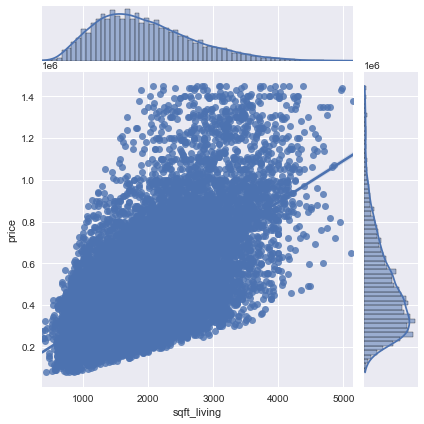

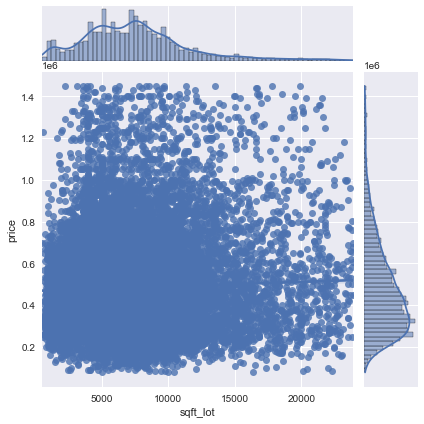

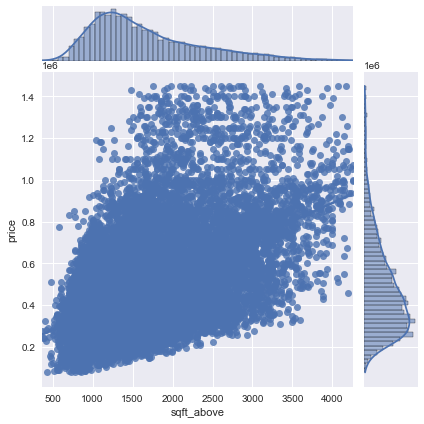

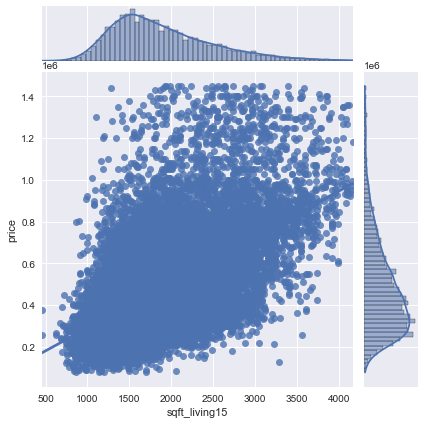

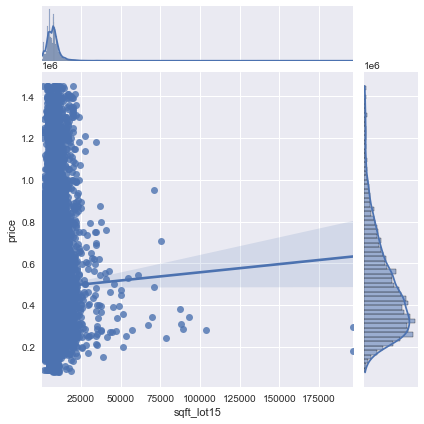

In [46]:
#Data Preparation for Modelling
#Investigating for linearity assumption
#investigating the relationship between price and the continuous variables in our data

features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']


#  Plot jointplots
for feature in features:
    sns.jointplot(x = df[feature], y = df['price'], kind = 'reg')
    plt.show()

The features appear to be linear. sqft_living and sqft_above show the best linearity with respect to price.

### Correlation and Multicollinearity

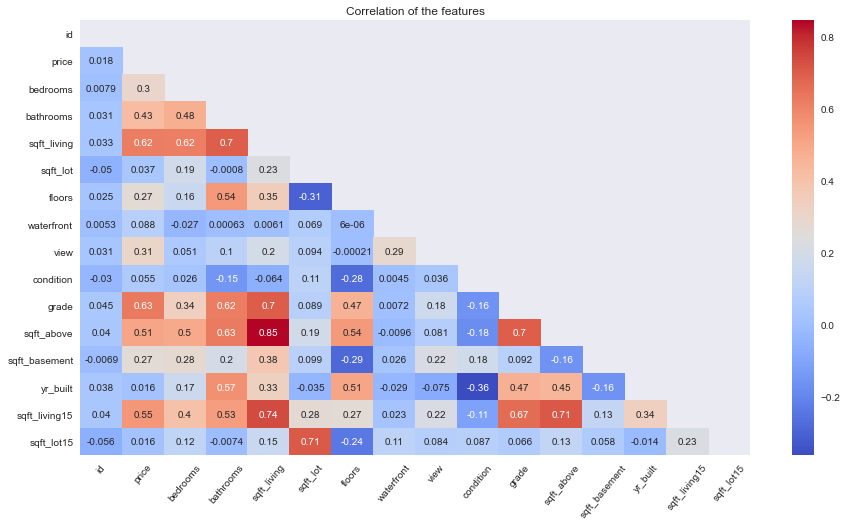

In [47]:
#Investigating Multi collinearity using correllation heatmap

cor_df = df.drop(['yr_renovated','zipcode','lat','long'], axis=1)
fig, ax = plt.subplots(figsize = (15,8))
mask = np.triu(np.ones_like(cor_df.corr()))
sns.heatmap(cor_df.corr(), cmap="coolwarm", annot=True, mask=mask)
plt.title('Correlation of the features')
plt.xticks(rotation=50)
plt.show()

Multicollinearity problems need to be addressed. 
The following predictor variable pairs have a high correlation which can cause multicollinearity problems:
1. sqft_above and sqft_living - 0.85
2. sqft_living and sqft_living15 - 0.74
3. sqft_lot and sqft_lot15 - 0.71
4. sqft_above and grade

To retain more information, we will retain sqft_living as it has a higher correlation with price and proceed to eliminate sqft_above and sqft_living15. 
Similarly, there is a substantial correlation between sqft_lot and sqft_lot15. We will opt to keep sqft_lot, as it directly pertains to the property itself.
We will also retain grade because of the wealth of information it encompasses as it comprises several features

In [48]:
# removing the features with multicollinearity problems

df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis=1)

## Modeling of the Data

Once we have removed the variables with multicollinearity, we need to select the features to use in our model based on the strength of their correlation with price.

In [49]:
corr = cor_df.corr()
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    features.append(idx)
    correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Feature': features}).sort_values(by=['Correlations'], ascending=False)

In [50]:
print('Correlations with Price')
display(corr_price_df)

Correlations with Price


,Correlations,Feature
1,1.000000,price
10,0.631905,grade
4,0.621368,sqft_living
14,0.549718,sqft_living15
11,0.507369,sqft_above
3,0.426518,bathrooms
8,0.307804,view
2,0.299926,bedrooms
12,0.268891,sqft_basement
6,0.266489,floors


#### Selecting features to use in regression modeling
1. Grade - has a higher correlation with price than overall condition 
2. sqft_living 
3. bathrooms
4. bedrooms
5. floors
6. sqft_lot
7. yr_built


In [51]:
# creating predictors

predictors = df['sqft_living']

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fitting baseline model

baseline_model = sm.OLS(df['price'], predictors_int).fit()

# checking model

print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                 1.193e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:09   Log-Likelihood:            -2.5704e+05
No. Observations:               18977   AIC:                         5.141e+05
Df Residuals:                   18975   BIC:                         5.141e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.011e+05   3759.917     26.881      

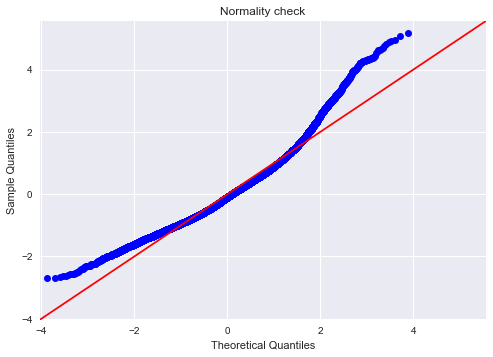

In [52]:
# check normality assumption

residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

It's important to highlight that two out of three assumptions of linearity are not met in this context. Specifically, the residuals do not exhibit a normal distribution, and the data lacks homoscedasticity. Our approach involves generating a summary of the current model, exploring the potential benefits of applying log transformations to both price and sqft_living to address these issues, and evaluating whether the inclusion of additional variables in our model can enhance the R^2.

In [53]:
# applying logarithmic function to independant variable
df['log_sqft_living'] = np.log(df['sqft_living'])


# re-creating the model with `log_sqft_living`
# creating predictors

predictors = df['log_sqft_living']

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fit model

log_model1 = sm.OLS(df['price'], predictors_int).fit()

# checking model

print(log_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     9972.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:09   Log-Likelihood:            -2.5766e+05
No. Observations:               18977   AIC:                         5.153e+05
Df Residuals:                   18975   BIC:                         5.153e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.173e+06   2.66e+04    -

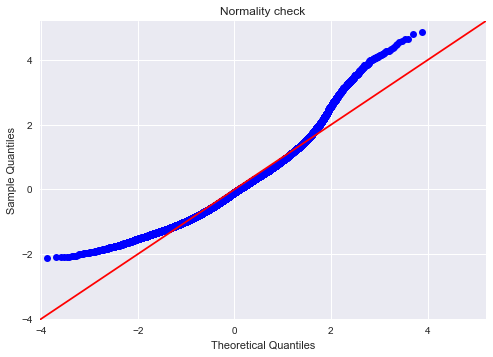

In [54]:
residuals = log_model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [55]:
# applying logarithmic function to dependant variable

df['log_price'] = np.log(df['price'])


# re-creating the model with `sqft_living`
# creating predictors

predictors = df['sqft_living']

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fit model
log_model2 = sm.OLS(df['log_price'], predictors_int).fit()

# checking model

print(log_model2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:10   Log-Likelihood:                -8039.2
No. Observations:               18977   AIC:                         1.608e+04
Df Residuals:                   18975   BIC:                         1.610e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2312      0.008   1624.221      

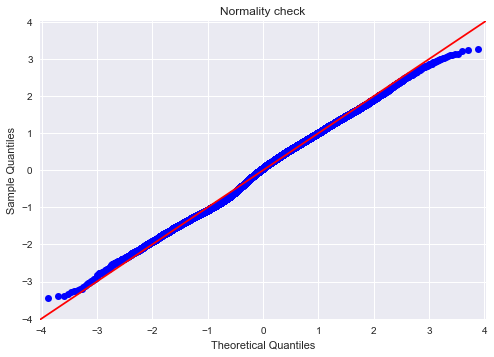

In [56]:
residuals = log_model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [57]:
#CHECKING BEDROOMS
# creating predictors

predictors = df[['sqft_living', 'bedrooms']]

# creating model intercept

predictors_int = sm.add_constant(predictors)

# fitting model

second_model = sm.OLS(df['log_price'], predictors_int).fit()

# checking model

print(second_model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     5904.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:10   Log-Likelihood:                -7913.1
No. Observations:               18977   AIC:                         1.583e+04
Df Residuals:                   18974   BIC:                         1.586e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.3514      0.011   1162.458      

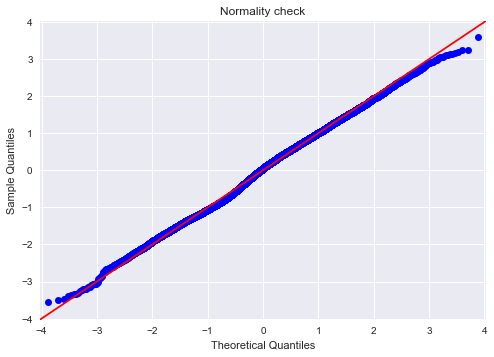

In [58]:
# checking normality assumption

residuals = second_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [59]:
#GRADE

# Creating a simple linear model using grade

y = df["price"]
x = df[["grade"]]
model_grade = sm.OLS(endog=y, exog=sm.add_constant(x))
grade_results = model_grade.fit()
print(grade_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                 1.261e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:10   Log-Likelihood:            -2.5683e+05
No. Observations:               18977   AIC:                         5.137e+05
Df Residuals:                   18975   BIC:                         5.137e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.162e+05   9892.741    -62.286      0.0

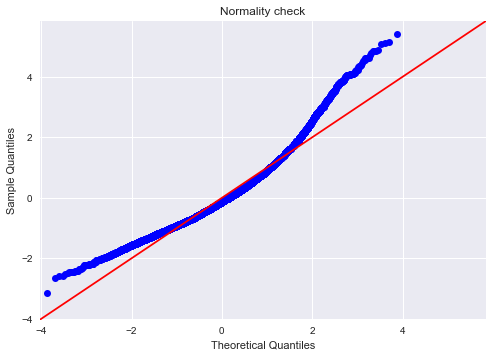

In [60]:
# checking normality assumption

residuals = grade_results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

In [61]:
#Multiple Linear Regression

x = df[['sqft_living', 'bedrooms', 'yr_built', 'grade']]
y = df['price']
predictors_int = sm.add_constant(x)

# fitting model

multilinear = sm.OLS(df['price'], predictors_int).fit()

# checking model

print(multilinear.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     6215.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:10   Log-Likelihood:            -2.5372e+05
No. Observations:               18977   AIC:                         5.074e+05
Df Residuals:                   18972   BIC:                         5.075e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         4.97e+06   8.03e+04     61.897      

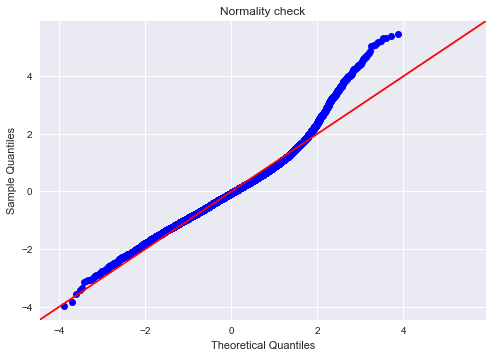

In [62]:
# checking Normality assumption

residuals = multilinear.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()


In [63]:
#Multiple Linear Regression Model 2 with all the chosen variables

x = df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'grade', 'yr_built']]
y = df['price']
predictors_int = sm.add_constant(x)

# fitting model

multilinear_2 = sm.OLS(df['price'], predictors_int)
results = multilinear_2.fit()

# checking model

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4404.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:10   Log-Likelihood:            -2.5339e+05
No. Observations:               18977   AIC:                         5.068e+05
Df Residuals:                   18970   BIC:                         5.068e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.674e+06    8.9e+04     63.751      

In [64]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     4404.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:13:10   Log-Likelihood:            -2.5339e+05
No. Observations:               18977   AIC:                         5.068e+05
Df Residuals:                   18970   BIC:                         5.068e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.674e+06    8.9e+04     63.751      

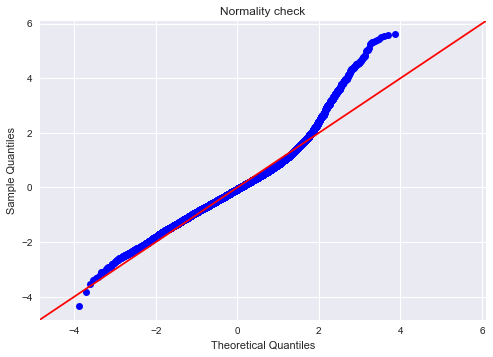

In [65]:
residuals = results.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.title("Normality check")
fig.show()

The best R-squared value was from the above model comprising six of the regression variables namely: sqft_living, sqft_lot, bedrooms, bathrooms, grade, and yr_built.

The R-squared value is stands at 0.582, indicating that 58.2% of the price variation can be elucidated by the independent variables within the model.

The F-statistic of 4404 has a p-value of 0.00 meaning that the model is statistically significant at a set alpha value of 0.05 since 0.00 is below 0.05

The co-efficient of the constant is also statistically significant with a p-value of 0.00

For individual variables:

- All the p-values of the coefficients are statistically significant as they are all 0.00

- **sqft_living:** The coefficient of 127.7869 signifies that a one-unit increase in square footage correlates with a $121.78 rise in price, with all other variables held constant.

- **sqft_lot**: The coefficient of -5.8597 signifies that a one-unit increase in square footage of the lot correlates with a $5.85 decrease in price, with all other variables held constant.

- **bedrooms:** With a coefficient of -2.228e+04, the presence of an additional bedroom is linked to a $222800 decrease in price, assuming all other variables remain constant.

- **bathrooms:** With a coefficient of 2.569e+04, the presence of an additional bathroom is linked to a $25690 increase in price, assuming all other variables remain constant.

- **yr_built**: The coefficient of -3188.3244 indicates that a one-year increment in the year built is associated with a $3188 reduction in price, holding all other variables constant.

- **grade**: A one-unit increase in grade corresponds to a $120,300 price increase, as suggested by the coefficient of 1.203e+05, assuming other variables remain constant.

### Model Evaluation

In [66]:
results.resid.abs()

0        136442.353952
1         52778.126753
2         72641.055886
3        144955.828623
4         58106.203124
             ...      
21592     68979.773904
21593     62997.664139
21594    188937.081663
21595     46504.092540
21596    107041.533698
Length: 18977, dtype: float64

In [67]:
#calculating mean absolute error
mae = results.resid.abs().sum() / len(y)
mae

113689.93109634527

The above MAE value means that for every house sale price prediction, our model is off by about 113,689. 
While this is quite a high number, it could be explained by the fact that our model predicts only about 58% of the variance in our dependent variable. 


### Findings and Summary

The predictor variables that are best correlated with the house sale price include grade, sqft_living, sqft_living15, sqft_above, bathrooms, view and bedrooms. 
Due to multicollinearity issues however, we can only include sqft_living and not sqft_living15 and sqft_above in a regression model. 

The variables that best predict the house sale price in a multiple linear regression model include sqft_living, sqft_lot, bedrooms, bathrooms, yr_built and grade.

These 6 variables give the best R-squared value of all the models that we fitted and together they explain for about 58% of the model variance. 

Based on our model analysis, it is evident that grade, bedrooms and bathrooms have the highest influence on the house price. 
High grade rating and increased number of bathrooms greatly increase house prices. 
Many bedrooms on the other hand decrease house prices, perhaps because the demand for luxurious housing associated with many bedrooms is not high in King County. 

Year built, square foot living and square foot of the lot on which a house is built on have significant influence on the house price as well.

The house features that developers can focus on to enhance affordable housing include bedrooms, bathrooms, grading and a waterfront. 

The typical expensive house will have an average number of bedrooms, higher than average number of bathrooms, a high grading and  a waterfront. 

Affordable housing therefore needs to focus on an average number of bedrooms, bathrooms, average grading and no waterfront. 

However, it is crucial to acknowledge certain limitations in the model. In order to align with our assumptions, we implemented log-transformations on select variables.



### Recommendations

In our quest to provide affordable housing solutions in King County, we recommned focusing on features that will ensure a standard and comfortable living space without including luxurious features that will push the price higher up. 

On this note we recommend developers to:

- Prioritize the construction of houses with a an average grade rating. These will be comfortable without experiencing the price inflation associated with higher grade rating.

- Focus more on properties away from the waterfront where price tends to be very high. 

- Limit the number of bedrooms and bathrooms to the requirements of an average home buyer in King County. Many bathrooms will increase house prices while many bedrooms will decrease prices as many people do not seem to be searching for luxurious housing. 



### Further Analysis

Investigate the impact of year renovated in relation to year built

Investigate the cause of the price decrease with increase in the number of bedrooms

Expand the dataset size to enhance model robustness.

Validate model predictions against a separate test dataset.